Hello World example on a 2-qubit Bell state

Step 1: Map the problem to circuits and operators

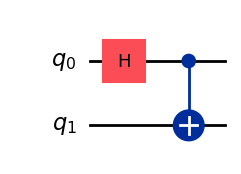

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [2]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

Step 2: Optimize

Step 3: Execute on the backend

In [3]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([ 1.        , -0.03710938, -0.03710938,  1.        , -0.03125   ,
       -0.03125   ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0040922, 'sample_measure_time': 0.0004137, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 31936, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 32, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9986228942871094, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0040922, 'sample_measure_time': 0.0004

Step 4: Post-process (and plotting)

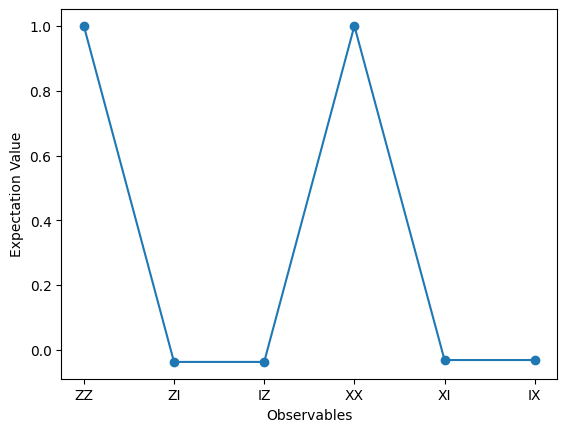

In [4]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Value')
plt.show()

Extend the Hello World example to an $n$-qubit GHZ state

Step 1: Map the problem to circuits and operators

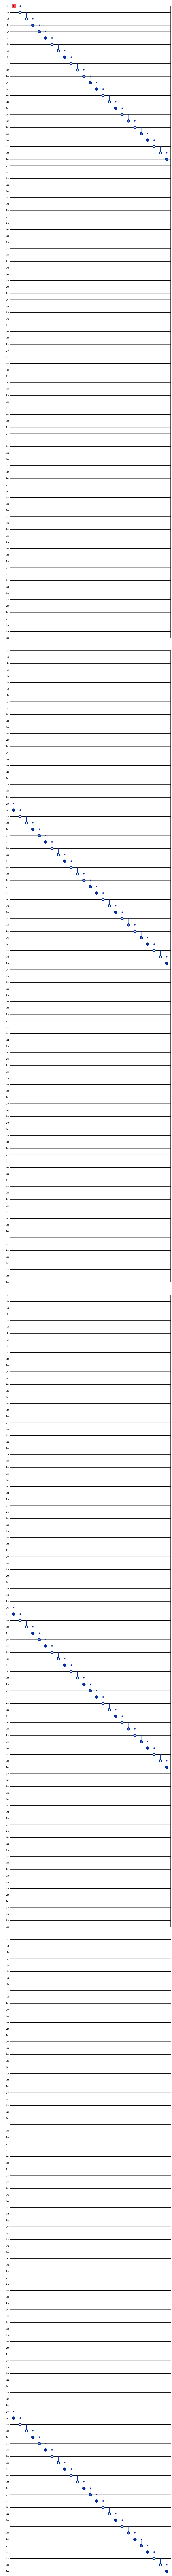

In [5]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [6]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

Step 2: Optimize the problem for quantum execution

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = 'ibm_brisbane'
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

Step 3: Execute on the backend

In [10]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

czga058aejkg008c8ze0


SentDex Tutorial

https://www.youtube.com/watch?v=aPCZcv-5qfA

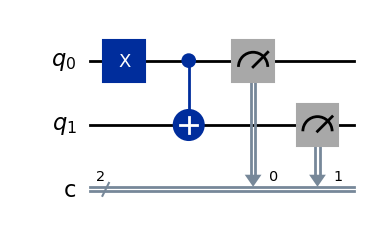

In [57]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# Currently: 0,0
circuit.x(0) # Not Gate, flipping the value of the qubit

# 1, 0
circuit.cx(0, 1) # CNOT, or controlled not. Flips 2nd Cubit value IIF first qubit is a 1

# 1, 1
circuit.measure([0,1], [0,1])
circuit.draw(output = 'mpl')

Now, run the circuit through Quantum machine

In [58]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService.save_account(channel = 'ibm_quantum', token="2ff98278712fb8aac3f1cb3a9a8c0f0811208a171ca3acb5ffd23a2ead5a872dacc9eb2a4d3c1556586d0faba765239daf41b5b2b88edb82cf7e28b56502ff32", overwrite=True)

In [59]:
# For next times, only run:

service = QiskitRuntimeService()

In [60]:
for backend in service.backends():
    try:
      qubit_count = len(backend.properties().qubits)
    except:
      qubit_count = 'Simulated'
    
    print(f"{backend.name} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibm_brisbane has 9 queued and 127 qubits
ibm_kyiv has 3 queued and 127 qubits
ibm_sherbrooke has 1 queued and 127 qubits


In [61]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=1)
print(backend.name)

ibm_sherbrooke


In [62]:
from qiskit import transpile

# Every backend has a different layout. 
# Transpilation also does some optimizations in order to reduce number of gates used.

qc_transpiled = transpile(circuit, backend, optimization_level=2)

In [68]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)
qc_job = sampler.run([qc_transpiled], shots=1000)

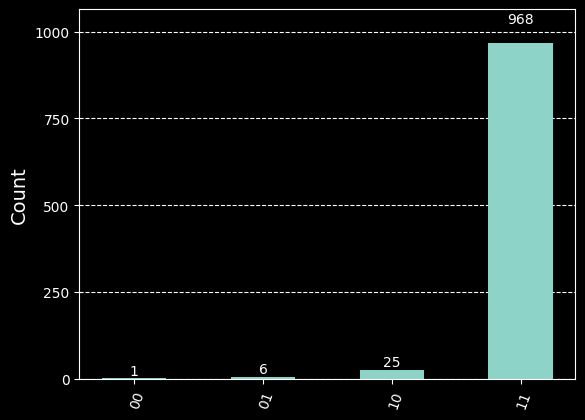

In [79]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('dark_background')

plot_histogram(qc_job.result()[0].data.c.get_counts())

Now, try the H gate, leveraging superposition

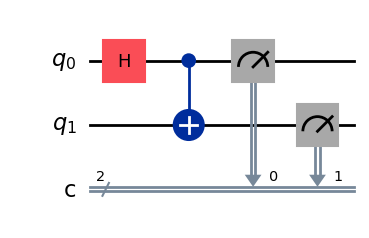

In [82]:
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# Currently: 0,0
circuit.h(0) # superposition

# 1, 0
circuit.cx(0, 1) # (entanglement) CNOT, or controlled not. Flips 2nd Cubit value IIF first qubit is a 1

# 1, 1
circuit.measure([0,1], [0,1])
circuit.draw(output = 'mpl')

In [83]:
qc_transpiled = transpile(circuit, backend, optimization_level=2)

sampler = Sampler(mode=backend)
qc_job = sampler.run([qc_transpiled], shots=1000)

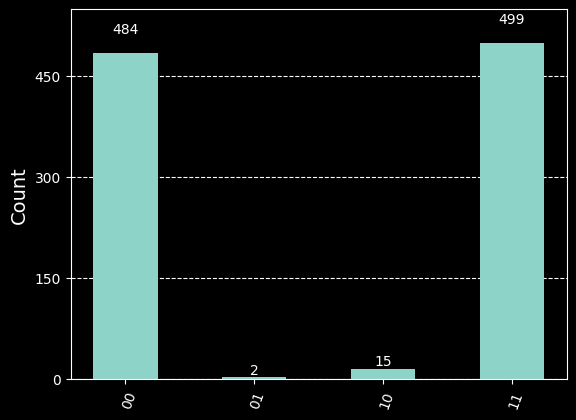

In [84]:
plot_histogram(qc_job.result()[0].data.c.get_counts())

Simulator framework for Qiskit

In [87]:
from qiskit_aer import Aer

In [89]:
for backend in Aer.backends():
    print(backend)

AerSimulator('aer_simulator')
AerSimulator('aer_simulator_statevector')
AerSimulator('aer_simulator_density_matrix')
AerSimulator('aer_simulator_stabilizer')
AerSimulator('aer_simulator_matrix_product_state')
AerSimulator('aer_simulator_extended_stabilizer')
AerSimulator('aer_simulator_unitary')
AerSimulator('aer_simulator_superop')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


In [90]:
sim_backend = Aer.get_backend('qasm_simulator')

In [97]:
job = sim_backend.run(qc_transpiled, shots=1000)
plot_histogram(job.result().data.c.get_counts())

AttributeError: 'function' object has no attribute 'c'

In [105]:
job.result().data

<bound method Result.data of Result(backend_name='qasm_simulator', backend_version='0.17.0', qobj_id='', job_id='82592d5d-5c03-41f4-bc99-f9cdf74a429f', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 516, '0x3': 484}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=2.3561944901923475, memory_slots=2, n_qubits=127, name='circuit-165', qreg_sizes=[['q', 127]], metadata={}), status=DONE, seed_simulator=3488573129, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [123, 124], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0061057, 'sample_measure_time': 0.0006545, 'input_qubit_map': [[123, 0], [124, 1]], 'max_memory_mb': 31936, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 32, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'ena

In [1]:
import numpy as np
import scenario_reduction as scen_red
scenarios = np.random.rand(10,30)  # Create 30 random scenarios of length 10. 
probabilities = np.random.rand(30)
probabilities = probabilities/np.sum(probabilities)  # Create random probabilities of each scenario and normalize 

S = scen_red.ScenarioReduction(scenarios, probabilities=probabilities, cost_func='general', r = 2, scen0 = np.zeros(10))
S.fast_forward_sel(n_sc_red=5, num_threads = 4)  # use fast forward selection algorithm to reduce to 5 scenarios with 4 threads 
scenarios_reduced = S.scenarios_reduced  # get reduced scenarios
probabilities_reduced = S.probabilities_reduced  # get reduced probabilities

ModuleNotFoundError: No module named 'scenario_reduction'